In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
loans = pd.read_csv('./ml_source_files/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
# 대출을 가능여부 판단-모델을 생성
# 데이터 - 고객의 특성에 따라 default 여부가 있는 데이터

In [14]:
# decisionTree, randomforest를 통해서 예측모델 생성, 테스트

In [144]:
y = loans['not.fully.paid']
x = loans.drop(['not.fully.paid'], axis=1)

In [145]:
# x = loans.drop(['not.fully.paid'], axis=1)

In [146]:
# one hot encoding
# pd.get_dummies()
#  문자열 칼럼의 데이터의 종류수 만큼 칼럼이 만들어진다.
#  문자열 칼럼이 데이터 수의 종류가 너무 많으면 칼럼이 너무 많이 생긴다 => 머신러닝 학습에 방해가 된다
# 문자열 칼럼의

In [147]:
x = pd.get_dummies(x)

In [148]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
det = DecisionTreeClassifier()

In [153]:
det.fit(x_train, y_train)

DecisionTreeClassifier()

In [154]:
det.score(x_test,y_test)

0.7484342379958246

In [155]:
preds = det.predict(x_test)

In [156]:
from sklearn.metrics import classification_report

In [157]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1635
           1       0.19      0.23      0.21       281

    accuracy                           0.75      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.77      0.75      0.76      1916



In [158]:
# randomforest

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
det_r = RandomForestClassifier(n_estimators=100,re)

In [170]:
det_r.fit(x_train, y_train)

RandomForestClassifier()

In [171]:
preds = det_r.predict(x_test)

In [172]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1635
           1       0.21      0.01      0.03       281

    accuracy                           0.85      1916
   macro avg       0.53      0.50      0.47      1916
weighted avg       0.76      0.85      0.79      1916



In [182]:
det_r.base_estimator_.predict(x_test)

TypeError: 'DecisionTreeClassifier' object is not callable

In [164]:
from sklearn.tree import plot_tree

In [165]:
plt.figure(figsize=(12,7))
plot_tree(det)
plt.show()

KeyboardInterrupt: 

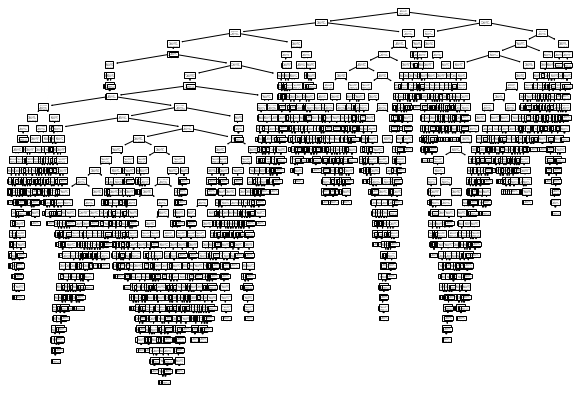

In [184]:
plt.figure(figsize=(10,7))
plot_tree(det_r.estimators_[0])
plt.show()

In [ ]:
# gridsearch

In [132]:
from sklearn.model_selection import GridSearchCV

In [134]:
params = {'n_estimators':[50, 100, 500], 'max_depth':[10,20,50],'min_samples_leaf':[2, 3, 5]}

In [135]:
rfc = RandomForestClassifier()
GridSearchCV(rfc, param_grid = params, refit=True, verbose=True)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=True)

In [136]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, refit=True, verbose=2)

In [137]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END ..max_depth=10, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.4s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=500; total time=   2.6s
[CV] END .max_depth=10, min_samples_leaf=2, n_e

[CV] END .max_depth=50, min_samples_leaf=2, n_estimators=500; total time=   3.8s
[CV] END .max_depth=50, min_samples_leaf=2, n_estimators=500; total time=   3.8s
[CV] END .max_depth=50, min_samples_leaf=2, n_estimators=500; total time=   3.8s
[CV] END .max_depth=50, min_samples_leaf=2, n_estimators=500; total time=   3.8s
[CV] END ..max_depth=50, min_samples_leaf=3, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=50, min_samples_leaf=3, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=50, min_samples_leaf=3, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=50, min_samples_leaf=3, n_estimators=50; total time=   0.3s
[CV] END ..max_depth=50, min_samples_leaf=3, n_estimators=50; total time=   0.3s
[CV] END .max_depth=50, min_samples_leaf=3, n_estimators=100; total time=   0.7s
[CV] END .max_depth=50, min_samples_leaf=3, n_estimators=100; total time=   0.7s
[CV] END .max_depth=50, min_samples_leaf=3, n_estimators=100; total time=   0.7s
[CV] END .max_depth=50, min_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=2)